## **Handling Missing Values**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/Combined_Dataset.csv')

# Note : Now we gonna find CPI , Unemployment and markdown columns  with the features of store,dept,type,size,temperature,fuel_price,isholiday

## Best Algorithm Selection Method

In [ ]:
def model_regression(xtrain, xtest, ytrain, ytest, algorithm):
  for i in algorithm:
    model = i().fit(xtrain, ytrain)

    # Predict for train and test accuracy
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    # R2 score
    train_r2 = r2_score(ytrain, y_train_pred)
    test_r2 = r2_score(ytest, y_test_pred)

    data = {'Algorithm':i.__name__, 'Training R2 Score':train_r2, 'Testing R2 Score':test_r2}

    print(data)

### Markdown Columns

#### Total null values in MarkDown

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,129909
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,271074
MarkDown2,343582
MarkDown3,296860


In [ ]:
df = df[['Store', 'Dept','IsHoliday', 'Temperature',
       'Fuel_Price','Day', 'Month', 'Year', 'Type',
       'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales']]

In [ ]:
df.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day',
       'Month', 'Year', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

### MarkDown 1

In [ ]:
mark_1 = df.drop(['Weekly_Sales', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], axis=1)
mark_1

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
mark_1.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


###**Null Values DF**

In [ ]:
mark_1_null = mark_1[mark_1.isnull().any(axis = 1)]
#mark_1_null.to_csv('mark_1_null.csv',index=False)

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('mark_1_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/mark_1_null.csv'

In [ ]:
mark_1_null.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


###**Not Null Values**

In [ ]:
mark_1_null

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
545135,45,93,0,43.92,3.551,4,11,2011,2,118221,NaN
545136,45,94,0,43.92,3.551,4,11,2011,2,118221,NaN
545137,45,95,0,43.92,3.551,4,11,2011,2,118221,NaN
545138,45,97,0,43.92,3.551,4,11,2011,2,118221,NaN


In [ ]:
mark_1_nn = mark_1.dropna()
mark_1_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
6587,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.90
6588,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.90
6589,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.90
6590,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.90
6591,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.90
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
x = mark_1_nn.drop('MarkDown1', axis = 1)
y = mark_1_nn['MarkDown1']

In [ ]:
x.shape, y.shape

((280405, 10), (280405,))

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
model_regression(xtrain, xtest, ytrain, ytest, [DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999865446572}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999941388089, 'Testing R2 Score': 0.9999999656891598}


#### Note: Here we choose RandomForestRegressor

In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)

In [ ]:
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/mark_1_null.csv')

In [ ]:
null_df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [ ]:
predicted_mark_1 = model.predict(null_df.drop(['MarkDown1'], axis = 1))
result  = pd.concat([mark_1_nn, null_df],axis = 0 , ignore_index = True)

In [ ]:
predicted_mark_1

array([5797.7752, 5797.7752, 5797.7752, ..., 7418.5118, 7418.5118,
       7418.5118])

In [ ]:
null_df.drop('MarkDown1', axis=1, inplace = True)

In [ ]:
null_df['MarkDown1'] = predicted_mark_1

In [ ]:
mark_1_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
6587,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.90
6588,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.90
6589,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.90
6590,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.90
6591,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.90
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752
...,...,...,...,...,...,...,...,...,...,...,...
271069,45,93,0,43.92,3.551,4,11,2011,2,118221,7418.5118
271070,45,94,0,43.92,3.551,4,11,2011,2,118221,7418.5118
271071,45,95,0,43.92,3.551,4,11,2011,2,118221,7418.5118
271072,45,97,0,43.92,3.551,4,11,2011,2,118221,7418.5118


In [ ]:
result = pd.concat([mark_1_nn,null_df], axis = 0, ignore_index =True)

In [ ]:
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.9000
1,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.9000
2,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.9000
3,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.9000
4,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.9000
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,93,0,43.92,3.551,4,11,2011,2,118221,7418.5118
551475,45,94,0,43.92,3.551,4,11,2011,2,118221,7418.5118
551476,45,95,0,43.92,3.551,4,11,2011,2,118221,7418.5118
551477,45,97,0,43.92,3.551,4,11,2011,2,118221,7418.5118


In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN


In [ ]:
merged_columns = ['Store','Dept','IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']
merged_dataset = df.merge(result, on=merged_columns, how='left')
merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1_x,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown1_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,5797.7752
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,5797.7752
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,5797.7752
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,5797.7752
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,5797.7752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200


In [ ]:
df["MarkDown1"] = merged_dataset["MarkDown1_y"]

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN


### MarkDown 2

In [ ]:
mark_2 = df.drop(['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
mark_2

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,851.73
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,851.73
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,851.73
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,851.73


In [ ]:
mark_2_null = mark_2[mark_2.isnull().any(axis = 1)]
#mark_2.to_csv("mark_2_null.csv", index = False)

mark_2_nn = mark_2.dropna()
x = mark_2_nn.drop('MarkDown2', axis = 1)
y = mark_2_nn['MarkDown2']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)


In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('mark_2_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/mark_2_null.csv'

In [ ]:
model_regression(xtrain, xtest, ytrain, ytest, [DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9999999999999981, 'Testing R2 Score': 0.9999999550500321}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999999982291, 'Testing R2 Score': 0.9999999999938466}


In [ ]:
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/mark_2_null.csv')

In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,851.73
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,851.73
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,851.73
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,851.73


In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)


# Prediction
predicted_mark_2 = model.predict(null_df.drop('MarkDown2', axis = 1))

null_df.drop('MarkDown2', axis=1, inplace = True)
null_df['MarkDown2'] = predicted_mark_2

In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,42.31,2.572,5,2,2010,1,151315,6409.2456
1,1,2,0,42.31,2.572,5,2,2010,1,151315,6409.2456
2,1,3,0,42.31,2.572,5,2,2010,1,151315,6409.2456
3,1,4,0,42.31,2.572,5,2,2010,1,151315,6409.2456
4,1,5,0,42.31,2.572,5,2,2010,1,151315,6409.2456
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,851.7300
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,851.7300
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,851.7300
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,851.7300


In [ ]:
null_df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [ ]:
result = pd.concat([mark_2_nn, null_df], axis = 0, ignore_index = True)

In [ ]:
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,59.11,3.297,11,11,2011,1,151315,6115.67
1,1,2,0,59.11,3.297,11,11,2011,1,151315,6115.67
2,1,3,0,59.11,3.297,11,11,2011,1,151315,6115.67
3,1,4,0,59.11,3.297,11,11,2011,1,151315,6115.67
4,1,5,0,59.11,3.297,11,11,2011,1,151315,6115.67
...,...,...,...,...,...,...,...,...,...,...,...
759371,45,94,0,76.06,3.804,26,7,2013,2,118221,851.73
759372,45,95,0,76.06,3.804,26,7,2013,2,118221,851.73
759373,45,96,0,76.06,3.804,26,7,2013,2,118221,851.73
759374,45,97,0,76.06,3.804,26,7,2013,2,118221,851.73


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

merged_dataset = df.merge(result, on = merge_columns, how = 'left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown2_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,6409.2456
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,6409.2456
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,6409.2456
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,6409.2456
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,6409.2456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759371,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.7300
759372,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.7300
759373,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.7300
759374,45,98,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.7300


In [ ]:
df['MarkDown2'] = merged_dataset['MarkDown2_y']
print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


### MarkDown 3  

In [ ]:
mark_3 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], axis =1)
mark_3

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,2.06
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,2.06
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,2.06
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,2.06


In [ ]:
mark_3_null = mark_3[mark_3.isnull().any(axis = 1)]
#mark_3_null.to_csv('mark_3_null.csv', index = False)

mark_3_nn = mark_3.dropna()

x = mark_3_nn.drop('MarkDown3', axis = 1)
y = mark_3_nn['MarkDown3']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('mark_3_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/mark_3_null.csv'

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.999999999994139}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999999992969, 'Testing R2 Score': 0.9999999999963662}


In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/mark_3_null.csv')

predicted_mark_3 = model.predict(null_df.drop('MarkDown3', axis = 1))
null_df.drop('MarkDown3', axis = 1, inplace = True)

null_df['MarkDown3'] = predicted_mark_3

In [ ]:
mark_3_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
6587,1,1,0,59.11,3.297,11,11,2011,1,151315,215.07
6588,1,2,0,59.11,3.297,11,11,2011,1,151315,215.07
6589,1,3,0,59.11,3.297,11,11,2011,1,151315,215.07
6590,1,4,0,59.11,3.297,11,11,2011,1,151315,215.07
6591,1,5,0,59.11,3.297,11,11,2011,1,151315,215.07
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,2.06
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,2.06
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,2.06
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,2.06


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
0,1,1,0,42.31,2.572,5,2,2010,1,151315,145.3908
1,1,2,0,42.31,2.572,5,2,2010,1,151315,145.3908
2,1,3,0,42.31,2.572,5,2,2010,1,151315,145.3908
3,1,4,0,42.31,2.572,5,2,2010,1,151315,145.3908
4,1,5,0,42.31,2.572,5,2,2010,1,151315,145.3908
...,...,...,...,...,...,...,...,...,...,...,...
296855,45,93,0,75.22,3.506,29,6,2012,2,118221,1.0468
296856,45,94,0,75.22,3.506,29,6,2012,2,118221,1.0468
296857,45,95,0,75.22,3.506,29,6,2012,2,118221,1.0468
296858,45,97,0,75.22,3.506,29,6,2012,2,118221,1.0468


In [ ]:
result = pd.concat([mark_3_nn, null_df], axis =0, ignore_index = True)

In [ ]:
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
0,1,1,0,59.11,3.297,11,11,2011,1,151315,215.0700
1,1,2,0,59.11,3.297,11,11,2011,1,151315,215.0700
2,1,3,0,59.11,3.297,11,11,2011,1,151315,215.0700
3,1,4,0,59.11,3.297,11,11,2011,1,151315,215.0700
4,1,5,0,59.11,3.297,11,11,2011,1,151315,215.0700
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,93,0,75.22,3.506,29,6,2012,2,118221,1.0468
551475,45,94,0,75.22,3.506,29,6,2012,2,118221,1.0468
551476,45,95,0,75.22,3.506,29,6,2012,2,118221,1.0468
551477,45,97,0,75.22,3.506,29,6,2012,2,118221,1.0468


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

merged_dataset = df.merge(result, on = merge_columns, how = 'left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3_x,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown3_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,NaN,NaN,NaN,211.096358,8.106,24924.50,145.3908
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,NaN,NaN,NaN,211.096358,8.106,50605.27,145.3908
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,NaN,NaN,NaN,211.096358,8.106,13740.12,145.3908
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,NaN,NaN,NaN,211.096358,8.106,39954.04,145.3908
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,NaN,NaN,NaN,211.096358,8.106,32229.38,145.3908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600


In [ ]:
df['MarkDown3'] = merged_dataset['MarkDown3_y']

In [ ]:
print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


### MarkDown 4

In [ ]:
mark_4 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'],axis=1)

mark_4

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,10.88
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,10.88
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,10.88
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,10.88


In [ ]:
mark_4_null = mark_4[mark_4.isnull().any(axis =1)]
#mark_4_null.to_csv('mark_4_null.csv', index = False)

mark_4_nn = mark_4.dropna()

x = mark_4_nn.drop('MarkDown4', axis =1)
y = mark_4_nn['MarkDown4']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('mark_4_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/mark_4_null.csv'

In [ ]:
mark_4_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
6587,1,1,0,59.11,3.297,11,11,2011,1,151315,2406.62
6588,1,2,0,59.11,3.297,11,11,2011,1,151315,2406.62
6589,1,3,0,59.11,3.297,11,11,2011,1,151315,2406.62
6590,1,4,0,59.11,3.297,11,11,2011,1,151315,2406.62
6591,1,5,0,59.11,3.297,11,11,2011,1,151315,2406.62
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,10.88
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,10.88
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,10.88
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,10.88


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/mark_4_null.csv')

# prediction
predicted_mark_4 = model.predict(null_df.drop('MarkDown4',axis=1))

null_df.drop('MarkDown4',axis=1,inplace =True)
null_df["MarkDown4"] = predicted_mark_4
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,42.31,2.572,5,2,2010,1,151315,24112.5520
1,1,2,0,42.31,2.572,5,2,2010,1,151315,24112.5520
2,1,3,0,42.31,2.572,5,2,2010,1,151315,24112.5520
3,1,4,0,42.31,2.572,5,2,2010,1,151315,24112.5520
4,1,5,0,42.31,2.572,5,2,2010,1,151315,24112.5520
...,...,...,...,...,...,...,...,...,...,...,...
302825,45,93,0,43.92,3.551,4,11,2011,2,118221,3114.0047
302826,45,94,0,43.92,3.551,4,11,2011,2,118221,3114.0047
302827,45,95,0,43.92,3.551,4,11,2011,2,118221,3114.0047
302828,45,97,0,43.92,3.551,4,11,2011,2,118221,3114.0047


In [ ]:
result = pd.concat([mark_4_nn, null_df], axis = 0, ignore_index = True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,59.11,3.297,11,11,2011,1,151315,2406.6200
1,1,2,0,59.11,3.297,11,11,2011,1,151315,2406.6200
2,1,3,0,59.11,3.297,11,11,2011,1,151315,2406.6200
3,1,4,0,59.11,3.297,11,11,2011,1,151315,2406.6200
4,1,5,0,59.11,3.297,11,11,2011,1,151315,2406.6200
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,93,0,43.92,3.551,4,11,2011,2,118221,3114.0047
551475,45,94,0,43.92,3.551,4,11,2011,2,118221,3114.0047
551476,45,95,0,43.92,3.551,4,11,2011,2,118221,3114.0047
551477,45,97,0,43.92,3.551,4,11,2011,2,118221,3114.0047


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md_1 = df.merge(result, on = merged_columns, how = 'left')

md_1

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4_x,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown4_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,NaN,NaN,211.096358,8.106,24924.50,24112.552
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,NaN,NaN,211.096358,8.106,50605.27,24112.552
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,NaN,NaN,211.096358,8.106,13740.12,24112.552
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,NaN,NaN,211.096358,8.106,39954.04,24112.552
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,NaN,NaN,211.096358,8.106,32229.38,24112.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.88,1864.57,NaN,NaN,NaN,10.880
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.88,1864.57,NaN,NaN,NaN,10.880
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.88,1864.57,NaN,NaN,NaN,10.880
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.88,1864.57,NaN,NaN,NaN,10.880


In [ ]:
df['MarkDown4'] = md_1['MarkDown4_y']
print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


### MarkDown 5

In [ ]:
mark_5 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],axis=1)
mark_5

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,1864.57
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,1864.57
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,1864.57
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,1864.57


In [ ]:
mark_5_null = mark_5[mark_5.isnull(). any(axis = 1)]
#mark_5_null.to_csv('mark_5_null.csv',index = False)

mark_5_nn = mark_5.dropna()
x = mark_5_nn.drop('MarkDown5', axis = 1)
y = mark_5_nn['MarkDown5']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('mark_5_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/mark_5_null.csv'

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999978987248}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}


In [ ]:
mark_5_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
6587,1,1,0,59.11,3.297,11,11,2011,1,151315,6551.42
6588,1,2,0,59.11,3.297,11,11,2011,1,151315,6551.42
6589,1,3,0,59.11,3.297,11,11,2011,1,151315,6551.42
6590,1,4,0,59.11,3.297,11,11,2011,1,151315,6551.42
6591,1,5,0,59.11,3.297,11,11,2011,1,151315,6551.42
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,1864.57
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,1864.57
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,1864.57
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,1864.57


In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/mark_5_null.csv')

# prediction
predicted_mark_5 = model.predict(null_df.drop('MarkDown5',axis =1))

null_df.drop('MarkDown5', axis = 1, inplace = True)
null_df['MarkDown5'] = predicted_mark_5
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,42.31,2.572,5,2,2010,1,151315,4611.1169
1,1,2,0,42.31,2.572,5,2,2010,1,151315,4611.1169
2,1,3,0,42.31,2.572,5,2,2010,1,151315,4611.1169
3,1,4,0,42.31,2.572,5,2,2010,1,151315,4611.1169
4,1,5,0,42.31,2.572,5,2,2010,1,151315,4611.1169
...,...,...,...,...,...,...,...,...,...,...,...
270133,45,93,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270134,45,94,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270135,45,95,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270136,45,97,0,43.92,3.551,4,11,2011,2,118221,3331.1421


In [ ]:
result = pd.concat([mark_5_nn, null_df], axis = 0, ignore_index =True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,59.11,3.297,11,11,2011,1,151315,6551.4200
1,1,2,0,59.11,3.297,11,11,2011,1,151315,6551.4200
2,1,3,0,59.11,3.297,11,11,2011,1,151315,6551.4200
3,1,4,0,59.11,3.297,11,11,2011,1,151315,6551.4200
4,1,5,0,59.11,3.297,11,11,2011,1,151315,6551.4200
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,93,0,43.92,3.551,4,11,2011,2,118221,3331.1421
551475,45,94,0,43.92,3.551,4,11,2011,2,118221,3331.1421
551476,45,95,0,43.92,3.551,4,11,2011,2,118221,3331.1421
551477,45,97,0,43.92,3.551,4,11,2011,2,118221,3331.1421


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,42.31,2.572,5,2,2010,1,151315,4611.1169
1,1,2,0,42.31,2.572,5,2,2010,1,151315,4611.1169
2,1,3,0,42.31,2.572,5,2,2010,1,151315,4611.1169
3,1,4,0,42.31,2.572,5,2,2010,1,151315,4611.1169
4,1,5,0,42.31,2.572,5,2,2010,1,151315,4611.1169
...,...,...,...,...,...,...,...,...,...,...,...
270133,45,93,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270134,45,94,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270135,45,95,0,43.92,3.551,4,11,2011,2,118221,3331.1421
270136,45,97,0,43.92,3.551,4,11,2011,2,118221,3331.1421


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

merged_dataset = df.merge(result, on = merge_columns, how = 'left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5_x,CPI,Unemployment,Weekly_Sales,MarkDown5_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,NaN,211.096358,8.106,24924.50,4611.1169
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,NaN,211.096358,8.106,50605.27,4611.1169
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,NaN,211.096358,8.106,13740.12,4611.1169
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,NaN,211.096358,8.106,39954.04,4611.1169
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,NaN,211.096358,8.106,32229.38,4611.1169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.57,NaN,NaN,NaN,1864.5700
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.57,NaN,NaN,NaN,1864.5700
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.57,NaN,NaN,NaN,1864.5700
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.57,NaN,NaN,NaN,1864.5700


In [ ]:
df['MarkDown5'] = merged_dataset['MarkDown5_y']
print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


###**CPI**

In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN,NaN


In [ ]:
cpi = df.drop(['Weekly_Sales', 'Unemployment'], axis=1)

cpi

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333


In [ ]:
cpi_null = cpi[cpi.isnull().any(axis = 1)]

cpi_null.to_csv('cpi_null.csv', index = False)

cpi_nn = cpi.dropna()

x = cpi_nn.drop('CPI', axis =1)
y = cpi_nn['CPI']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

model_regression(xtrain, xtest, ytrain, ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999883762080461, 'Testing R2 Score': 0.9999888330098755}


In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('cpi_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/cpi_null.csv'

In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)

null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/cpi_null.csv')

# Predictiom
predicted_cpi = model.predict(null_df.drop('CPI', axis = 1))

null_df.drop('CPI', axis = 1, inplace = True)
null_df['CPI'] = predicted_cpi
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,2,94,0,51.33,3.227,25,1,2013,1,202307,1599.61,177.4772,0.60,161.21,1963.72,225.161505
1,2,96,0,51.33,3.227,25,1,2013,1,202307,1599.61,177.4772,0.60,161.21,1963.72,225.158620
2,2,98,0,51.33,3.227,25,1,2013,1,202307,1599.61,177.4772,0.60,161.21,1963.72,225.014445
3,2,1,0,54.75,3.244,1,2,2013,1,202307,13078.90,177.4772,545.20,12725.35,5002.74,225.157617
4,2,3,0,54.75,3.244,1,2,2013,1,202307,13078.90,177.4772,545.20,12725.35,5002.74,225.157617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,28,99,0,42.83,3.393,21,12,2012,1,206302,3577.43,1716.4700,122.92,36.29,2530.09,139.010848
1416,28,2,1,43.35,3.480,28,12,2012,1,206302,12973.34,446.0200,173.10,63.89,1894.52,141.026340
1417,28,4,1,43.35,3.480,28,12,2012,1,206302,12973.34,446.0200,173.10,63.89,1894.52,141.026340
1418,28,6,1,43.35,3.480,28,12,2012,1,206302,12973.34,446.0200,173.10,63.89,1894.52,141.026340


In [ ]:
result = pd.concat([cpi_nn, null_df], axis =0, ignore_index = True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,28,99,0,42.83,3.393,21,12,2012,1,206302,3577.4300,1716.4700,122.9200,36.290,2530.0900,139.010848
551475,28,2,1,43.35,3.480,28,12,2012,1,206302,12973.3400,446.0200,173.1000,63.890,1894.5200,141.026340
551476,28,4,1,43.35,3.480,28,12,2012,1,206302,12973.3400,446.0200,173.1000,63.890,1894.5200,141.026340
551477,28,6,1,43.35,3.480,28,12,2012,1,206302,12973.3400,446.0200,173.1000,63.890,1894.5200,141.026340


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']
merged_dataset = df.merge(result, on = merge_columns, how = 'left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,MarkDown5_x,CPI_x,Unemployment,Weekly_Sales,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,4611.1169,211.096358,8.106,24924.50,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,4611.1169,211.122158,8.106,50605.27,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,4611.1169,211.096358,8.106,13740.12,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,4611.1169,211.122158,8.106,39954.04,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,4611.1169,211.096358,8.106,32229.38,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333


In [ ]:
df['CPI'] = merged_dataset['CPI_y']
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


### Unemployment Column

In [ ]:
unemployment = df.drop(['Weekly_Sales'], axis = 1)
unemployment

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,NaN


In [ ]:
unemployment_null = unemployment[unemployment.isnull().any(axis = 1)]
unemployment_null.to_csv('unemployment_null.csv', index = False)

unemployment_nn = unemployment.dropna()
x = unemployment_nn.drop('Unemployment', axis =1)
y = unemployment_nn['Unemployment']

xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size =0.2)

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('unemployment_null.csv', drive_path)


'/content/drive/MyDrive/Final_Capstone/unemployment_null.csv'

In [ ]:
unemployment_null

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
12246,1,1,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,NaN
12247,1,2,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.392149,NaN
12248,1,3,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,NaN
12249,1,4,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.392149,NaN
12250,1,5,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,NaN


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999683865908, 'Testing R2 Score': 0.9999999958303188}


In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)

null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/unemployment_null.csv')

In [ ]:
predicted_unemployment = model.predict(null_df.drop('Unemployment', axis = 1))
null_df.drop('Unemployment', axis = 1)

null_df["Unemployment"] = predicted_unemployment

In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,6.3140
1,1,2,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.245920,6.3140
2,1,3,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,6.3140
3,1,4,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.245920,6.3140
4,1,5,0,66.66,3.386,3,5,2013,1,151315,2298.63,102.32,129.90,55.46,1301.04,216.375825,6.3140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,8.5637
44719,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,8.5637
44720,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,8.5637
44721,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,1251.26,2.06,10.88,1864.57,132.473333,8.5637


In [ ]:
result = pd.concat([unemployment_nn, null_df], axis = 0, ignore_index = True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.1060
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.1060
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552894,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552895,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552896,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552897,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']
merge_dataset = df.merge(result, on = merge_columns, how = 'left')

merge_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,CPI_x,Unemployment_x,Weekly_Sales,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,24924.50,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,211.122158,8.106,50605.27,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.1060
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,13740.12,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,211.122158,8.106,39954.04,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.1060
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,32229.38,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552894,45,94,0,76.06,3.804,26,7,2013,2,118221,...,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552895,45,95,0,76.06,3.804,26,7,2013,2,118221,...,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552896,45,96,0,76.06,3.804,26,7,2013,2,118221,...,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637
552897,45,97,0,76.06,3.804,26,7,2013,2,118221,...,132.473333,NaN,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.5637


In [ ]:
df['Unemployment'] = merge_dataset['Unemployment_y']
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


### Weekly_Sales

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN


In [ ]:
df["Weekly_Sales"].min(), df["Weekly_Sales"].max()

(-4988.94, 693099.36)

In [ ]:
# Weekly value less than 1 then make it None

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x : None if x<1 else x)

In [ ]:
# Weekly_Sales befor prediction
df["Weekly_Sales"].min(), df["Weekly_Sales"].max()

(1.0, 693099.36)

In [ ]:
weekly_sales = df.copy()
weekly_sales

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,NaN


In [ ]:
weekly_sales_null = weekly_sales[weekly_sales.isnull().any(axis = 1)]
#weekly_sales_null.to_csv('weekly_sales_null.csv', index = False)

weekly_sales_nn = weekly_sales.dropna()

x = weekly_sales_nn.drop(["Weekly_Sales"], axis = 1)
y = weekly_sales_nn["Weekly_Sales"]




In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9961968316109857, 'Testing R2 Score': 0.9755678093613814}


In [ ]:
weekly_sales_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548588,45,93,0,58.85,3.882,26,10,2012,2,118221,4018.9100,27.9400,100.0000,211.940,858.3300,139.098957,8.567,2487.80
548589,45,94,0,58.85,3.882,26,10,2012,2,118221,4018.9100,27.9400,100.0000,211.940,858.3300,139.098957,8.567,5203.31
548590,45,95,0,58.85,3.882,26,10,2012,2,118221,4018.9100,27.9400,100.0000,211.940,858.3300,139.098957,8.567,56017.47
548591,45,97,0,58.85,3.882,26,10,2012,2,118221,4018.9100,27.9400,100.0000,211.940,858.3300,139.098957,8.567,6817.48


In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('weekly_sales_null.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/weekly_sales_null.csv'

In [ ]:
model = RandomForestRegressor().fit(xtrain, ytrain)
null_df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/weekly_sales_null.csv')

# Prediction

predicted_weekly_sales = model.predict(null_df.drop('Weekly_Sales', axis = 1))
null_df.drop('Weekly_Sales', axis = 1, inplace = True)
null_df['Weekly_Sales'] = predicted_weekly_sales
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,47,0,39.93,2.514,19,2,2010,1,151315,50094.3970,13933.9400,39.2933,9017.0211,3997.7871,211.242170,8.106,412.8610
1,1,47,0,57.79,2.667,12,3,2010,1,151315,20599.1379,17579.5651,40.5407,1280.9844,4845.7060,211.289143,8.106,385.8536
2,1,51,0,62.27,2.719,2,4,2010,1,151315,8825.0285,17583.8383,121.3558,3853.3213,5782.8646,211.295667,7.808,34.9804
3,1,18,0,74.78,2.854,14,5,2010,1,151315,7504.8518,116.5162,36.3776,3349.4592,3567.9696,211.060847,7.808,17.2808
4,1,18,0,80.43,2.668,11,6,2010,1,151315,10502.4999,106.4594,14.2380,2726.8560,2945.0405,210.622857,7.808,18.1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131910,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.8800,1864.5700,132.473333,8.625,3326.5400
131911,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.8800,1864.5700,132.473333,8.625,61087.7479
131912,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.8800,1864.5700,132.473333,8.625,3033.3741
131913,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.8800,1864.5700,132.473333,8.625,5779.7721


In [ ]:
result = pd.concat([weekly_sales_nn, null_df], axis = 0, ignore_index = True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3326.5400
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,61087.7479
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3033.3741
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,5779.7721


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']
merged_dataset = df.merge(result, on= merge_columns, how = 'left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,Unemployment_x,Weekly_Sales_x,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y,Weekly_Sales_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,8.106,24924.50,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,8.106,50605.27,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,8.106,13740.12,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,8.106,39954.04,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,8.106,32229.38,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,...,8.625,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3326.5400
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,...,8.625,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,61087.7479
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,...,8.625,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3033.3741
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,...,8.625,NaN,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,5779.7721


In [ ]:
df['Weekly_Sales'] = merged_dataset['Weekly_Sales_y']
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [ ]:
df["Weekly_Sales"].min,df["Weekly_Sales"].max

(<bound method Series.min of 0         24924.5000
 1         50605.2700
 2         13740.1200
 3         39954.0400
 4         32229.3800
              ...    
 551474     3326.5400
 551475    61087.7479
 551476     3033.3741
 551477     5779.7721
 551478     1037.9059
 Name: Weekly_Sales, Length: 551479, dtype: float64>,
 <bound method Series.max of 0         24924.5000
 1         50605.2700
 2         13740.1200
 3         39954.0400
 4         32229.3800
              ...    
 551474     3326.5400
 551475    61087.7479
 551476     3033.3741
 551477     5779.7721
 551478     1037.9059
 Name: Weekly_Sales, Length: 551479, dtype: float64>)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Final_Capstone/RFS_cleaned_data.csv')

In [ ]:
import shutil
drive_path = '/content/drive/MyDrive/Final_Capstone'
shutil.copy('RFS_cleaned_data.csv', drive_path)

'/content/drive/MyDrive/Final_Capstone/RFS_cleaned_data.csv'

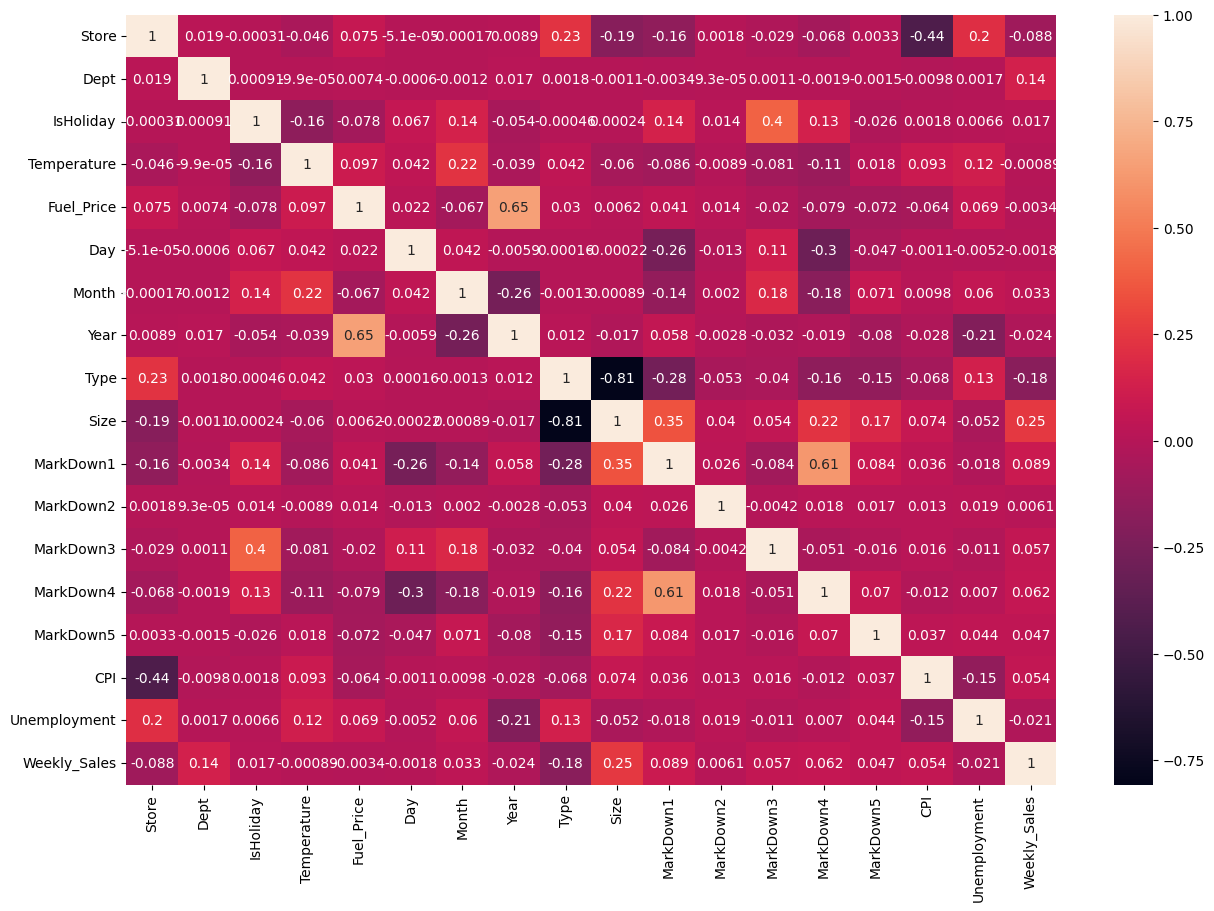

In [6]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

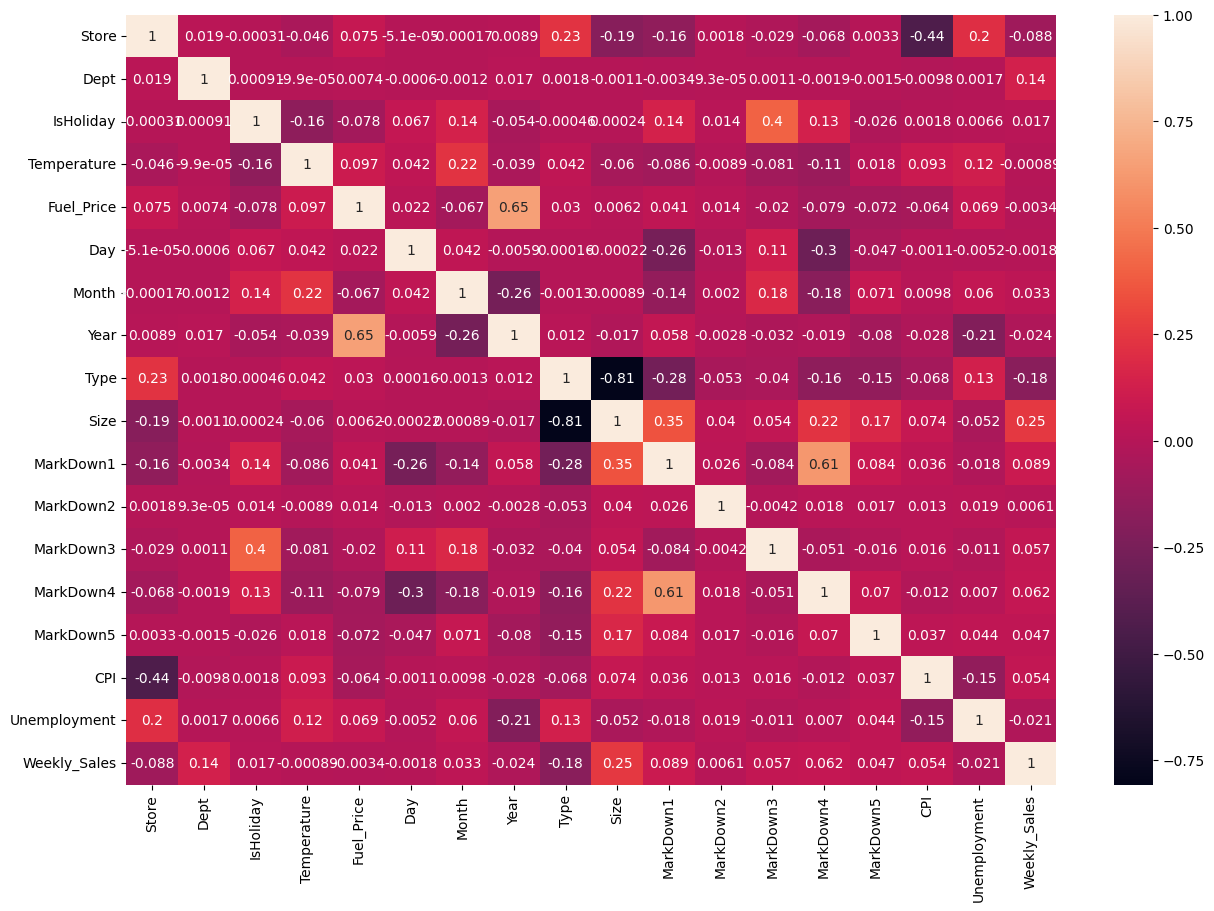

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000
Fuel_Price,551479.0,3.413010,0.427725,2.472,3.050000,3.524000,3.746000,4.468000
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000


In [9]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.122158,8.106,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,5797.7752,6409.2456,145.3908,24112.552,4611.1169,211.096358,8.106,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3326.5400
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,61087.7479
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,3033.3741
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,1251.2600,2.0600,10.880,1864.5700,132.473333,8.625,5779.7721


In [10]:
df.isnull().sum()

,0
Store,0
Dept,0
IsHoliday,0
Temperature,0
Fuel_Price,0
Day,0
Month,0
Year,0
Type,0
Size,0


In [11]:
df.dtypes

,0
Store,int64
Dept,int64
IsHoliday,int64
Temperature,float64
Fuel_Price,float64
Day,int64
Month,int64
Year,int64
Type,int64
Size,int64
